# Live Laugh Love Presentation
Our group tackled the question of whihc neighborhood in Pittsburgh is best by analyzing data from the perspective of a prospective retiree. The metric we chose to evaluate this is livability.

## Defining Livability
Our group defined livability as conditions which contribute to an increased qualitify of life for the residents of a neighhborhood. This metric seems broad, but we found it to be relatively straightforward to understand which submetrics would contribute to livability. Specifically, the submetrics our gorup analyzed were population density, crime rate, and land usage, three factors that we thought contributed singificantly to livability and would be of concern to a retiree.

## Part 1: Population Density
Population density is essentially the ratio between the number of people living in a region and the amount of land within that region. It outlines the number of people expected to be living in a certain land area.

### Population Density and Livability
Intitially, population density might seem like a strane metric for measuring livability, but the connection is actually quite simple. A lower population density implies than an individual is able to take up more space in the environment, implying more comfortable living, contributing to a greater livability. To simplify, lower population density makes a space more livable for its residents.

### Data Used
In order analyze this metric, I used population density data from the 2010 SNAP Census of Pittsburgh. While this data is somewhat outdated and the individual datapoints are sure to have changed since, it should still project relatively well in terms of the general placement of each neighborhood.

### Analysis Overview
Here is the initial dataset used.

In [1]:
import pandas as pd # we're obviously gonna need pandas for this stuff
import matplotlib.pyplot as plt
import geopandas

data = pd.read_excel('population-density.xls') # importing data from Excel file
data.head(5)

,Neighborhood,Sector #,Pop. 1940,Pop. 1950,Pop. 1960,Pop. 1970,Pop. 1980,Pop. 1990,Pop. 2000,Pop. 2010,...,% Other (2010),% White (2010),% 2+ Races (2010),% Hispanic (of any race) (2010),% Pop. Age < 5 (2010),% Pop. Age 5-19 (2010),% Pop. Age 20-34 (2010),% Pop. Age 35-59 (2010),% Pop. Age 60-74 (2010),% Pop. Age > 75 (2010)
0,Allegheny Center,3,4521,3862,2512,632,1586,1262,886,933,...,0.006431,0.408360,0.0397,0.029,0.0419,0.2170,0.2757,0.2243,0.1761,0.0650
1,Allegheny West,3,3210,3313,2170,1124,820,654,508,462,...,0.006494,0.766234,0.0303,0.028,0.0000,0.0000,0.0837,0.6820,0.1255,0.1088
2,Allentown,6,8227,7487,6416,5361,4292,3600,3220,2500,...,0.008000,0.594000,0.0464,0.023,0.0366,0.1485,0.2411,0.3530,0.1440,0.0767
3,Arlington,7,2702,3203,4430,3949,2294,2210,1999,1869,...,0.003745,0.764580,0.0316,0.014,0.0691,0.1889,0.1945,0.3153,0.0888,0.1433
4,Arlington Heights,7,2413,2860,2272,2037,1466,1497,238,244,...,0.016393,0.094262,0.0492,0.008,0.0410,0.3925,0.1638,0.3072,0.0341,0.0614


While informative, this dataset has far too many irrelevant datapoints and is presented in an unhelpful manner. After filtering out the unnecessary datapoints and ordering out the neighborhoods, here is what we are left with. 

In [3]:
popDenData = data[["Neighborhood", # filtering out columns
                   "Pop. 2010",
                   "Land Area (sq. mi)",
                   "Persons / sq. mi (2010)"]] 
popDenData.sort_values(by = ["Persons / sq. mi (2010)"], # listing in ascending order
                       inplace = True, ascending = True)
popDenData.head(10)

/tmp/ipykernel_12095/574423063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popDenData.sort_values(by = ["Persons / sq. mi (2010)"], # filter out neighborhood with <100 people in them


,Neighborhood,Pop. 2010,Land Area (sq. mi),Persons / sq. mi (2010)
21,Chateau,11,0.383,28.720627
70,South Shore,19,0.212,89.622642
37,Hays,362,1.750,206.857143
77,St. Clair,209,0.310,674.193548
56,North Shore,303,0.303,1000.000000
79,Strip District,616,0.608,1013.157895
31,Fairywood,1002,0.969,1034.055728
54,New Homestead,990,0.794,1246.851385
86,West End,254,0.200,1270.000000
30,Esplen,301,0.230,1308.695652


Notice that Chateau and South Shore have very few residents. This makes them ultimately irrelevant in our analysis, as livability also implies that housing is readily available. We'll remove them to conclude our data manipulation.

In [4]:
popMask = popDenData['Pop. 2010'] >= 100
finalPopDenData = popDenData[popMask]

finalPopDenData.head(10)

,Neighborhood,Pop. 2010,Land Area (sq. mi),Persons / sq. mi (2010)
37,Hays,362,1.750,206.857143
77,St. Clair,209,0.310,674.193548
56,North Shore,303,0.303,1000.000000
79,Strip District,616,0.608,1013.157895
31,Fairywood,1002,0.969,1034.055728
54,New Homestead,990,0.794,1246.851385
86,West End,254,0.200,1270.000000
30,Esplen,301,0.230,1308.695652
66,Ridgemont,483,0.369,1308.943089
26,East Carnegie,570,0.432,1319.444444


When graphed, our results look like this.

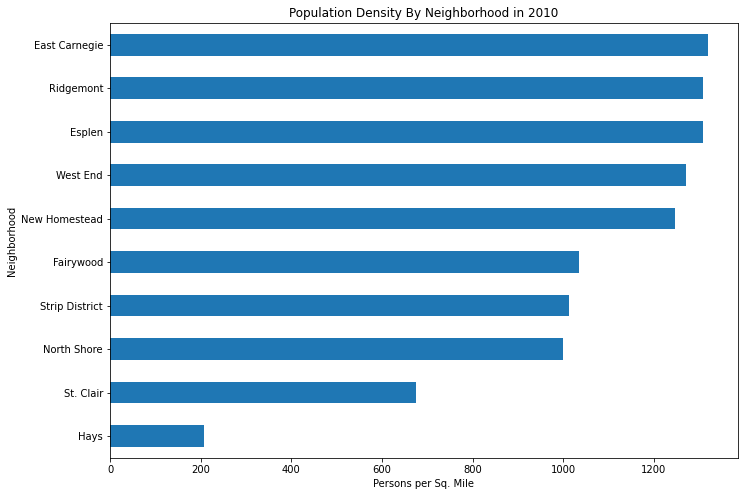

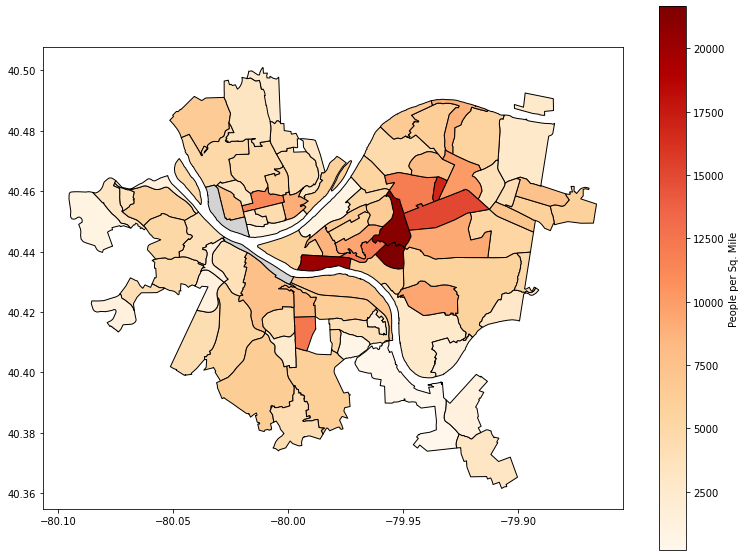

In [5]:
# plot bar graph
ax = finalPopDenData.head(10).plot.barh(x='Neighborhood',
                                   y='Persons / sq. mi (2010)',
                                   rot = 0,
                                   figsize=(11.25, 8),
                                   legend = False,
                                   title='Population Density By Neighborhood in 2010')
ax.set(xlabel="Persons per Sq. Mile", ylabel="Neighborhood")

# plot heat map
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
popDenHeatMap = neighborhoods.merge(finalPopDenData, how='left', left_on='hood', right_on='Neighborhood')
popDenHeatMap.plot(column='Persons / sq. mi (2010)',legend = True,
                cmap = "OrRd",
                edgecolor="black",
                legend_kwds={'label': "People per Sq. Mile"},
                figsize=(13, 10),
                missing_kwds={"color": "lightgrey"}) # set disqualified neighborhoods to gray

### Results
Based on the above results, Hays, St. Clair, and North Shore were the top 3 least dense neighborhoods.

## Part 2: Land Usage